**1) Import Necessay Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**2) Load the Dataset**

In [3]:
# Download the dataset from Google Drive
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2 -O groceries.csv

df = pd.read_csv("groceries.csv")
print("Dataset Shape: ")
print(df.shape)

print("First few rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())



Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/groceries.csv
100% 14.6k/14.6k [00:00<00:00, 39.6MB/s]
Dataset Shape: 
(440, 8)
First few rows of the dataset:
   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 no

**3) Basic Preprocessing**

In [4]:
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64


In [5]:


# Separate features and target
X = df.drop("class", axis=1)
y = df["class"]

# Check class distribution (imbalance check)
print("Class distribution:\n", y.value_counts(normalize=True), "\n")

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Convert scaled arrays back to DataFrame (for display/saving)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

print("Sample preprocessed training data:\n", X_train_df.head(), "\n")
print("y_train sample:\n", y_train.head(), "\n")

# Save processed data (optional)
train_processed = X_train_df.copy()
train_processed["class"] = y_train.values
test_processed = X_test_df.copy()
test_processed["class"] = y_test.values

train_processed.to_csv("groceries_train_processed.csv", index=False)
test_processed.to_csv("groceries_test_processed.csv", index=False)

Class distribution:
 class
2    0.409091
3    0.393182
1    0.197727
Name: proportion, dtype: float64 

Sample preprocessed training data:
      Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0  0.590668 -0.942242 -0.297242  0.468664 -0.613289          0.018584   
1  0.590668 -0.625531  3.268554  1.992626 -0.094023          3.119940   
2  0.590668 -0.232669 -0.673803 -0.765698  2.855564         -0.474651   
3 -0.702337 -0.937176  0.225683  1.772133 -0.506260          1.869109   
4 -1.995342 -0.687353  0.109297 -0.114858 -0.359430          0.226671   

   Delicassen  
0   -0.519319  
1   -0.065629  
2   -0.491984  
3    0.314221  
4   -0.110004   

y_train sample:
 412    2
56     2
277    3
304    2
213    3
Name: class, dtype: int64 



**4) Optimal K-valu**e

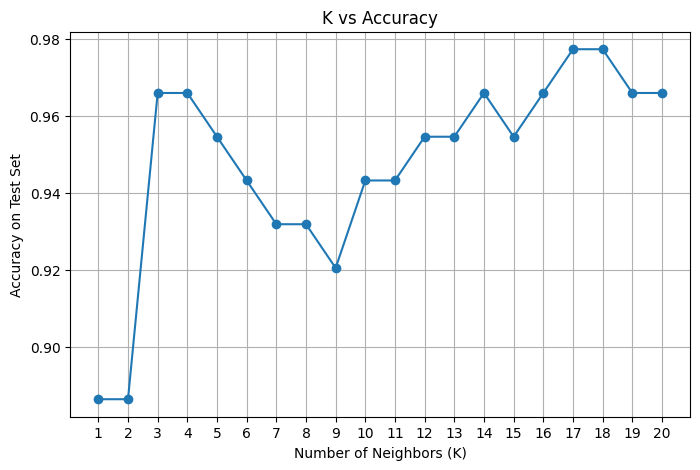

✅ Best K = 17 with accuracy = 0.98


In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try values of K from 1 to 20
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(k_range, scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy on Test Set")
plt.title("K vs Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Print the best K
best_k = k_range[scores.index(max(scores))]
print(f"✅ Best K = {best_k} with accuracy = {max(scores):.2f}")


**5) KNN Scratch Implementation**

In [10]:
from collections import Counter

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN from scratch
class KNN_Scratch:
    def __init__(self, k=17):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        # Compute distances to all training samples
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Train & Test Scratch KNN
knn_scratch = KNN_Scratch(k=17)
knn_scratch.fit(X_train, y_train)
y_pred_scratch = knn_scratch.predict(X_test)

# Accuracy
scratch_acc = np.mean(y_pred_scratch == y_test)
print("Scratch KNN Accuracy:", scratch_acc)

Scratch KNN Accuracy: 0.9659090909090909


**6) KNN with Scikit-learn**

In [11]:
# --- Step 3: KNN with Scikit-learn ---
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

sk_preds = knn.predict(X_test)

sk_acc = accuracy_score(y_test, sk_preds)
print(f"KNN (Sklearn) Accuracy: {sk_acc}")


KNN (Sklearn) Accuracy: 0.9772727272727273
